In [35]:
#knn

In [36]:
import pandas as pd

In [37]:
data=pd.read_csv("e:/bcancer.csv")

In [38]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [39]:
#if there is a column to be unnamed 0 then drop it
#data.drop('Unnamed: 0',1,inplace=True)
data=data.replace('?',99999999)

In [40]:
x=data.drop(['Sample code number','Class'],1)
y=data['Class']

In [41]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

C:\Users\amit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
alg=KNeighborsClassifier()

In [44]:
alg.fit(x_train,y_train)
alg.score(x_test,y_test)

0.96190476190476193

In [45]:
alg.predict([[1,0,2,2,2,2,2,2,1]])

array([2], dtype=int64)

In [46]:
import numpy as np
np.sqrt(sum((np.array([1,2,7,9,12])-np.array([6,7,4,5,5]))**2))

11.135528725660043

In [47]:
np.linalg.norm(np.array([1,2,7,9,12])-np.array([6,7,4,5,5]))

11.135528725660043

In [48]:
data={"+":[[1,2],[3,1],[2,1.5],[1,3]],"*":[[5,6],[7,8],[6,7.5]]}

In [49]:
import matplotlib.pyplot as plt

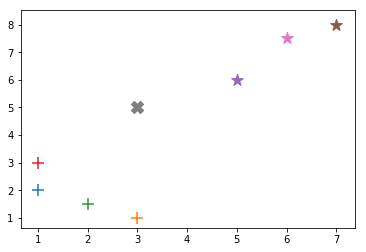

In [50]:
for grp in data:
    for i in data[grp]:
        plt.scatter(*i,marker=grp,s=150)
plt.scatter(3,5,marker="X",s=150)
plt.show()

In [51]:
from collections import Counter
def knn(train,pt):
    dist=[]
    for grp in train:
        for i in train[grp]:
            dist.append((np.linalg.norm(np.array(i)-np.array(pt)),grp))
    votes=sorted(dist)[:3]
    votes=[i[1] for i in votes]
    return Counter(votes).most_common(1)[0][0]
knn(data,[3,5])
            
        

'+'

In [52]:
bdata=pd.read_csv("e:/bcancer.csv")

In [58]:
bdata=bdata.replace("?",9999999)
bdata['Bare Nuclei ']=bdata['Bare Nuclei '].astype(dtype=np.int64)

In [59]:
blist=bdata.values.tolist()

In [64]:
train_data=blist[:int(len(bdata)*0.7)]
test_data=blist[int(len(bdata)*0.7):]

In [67]:
train_set={2:[],4:[]}
test_set={2:[],4:[]}
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])


In [71]:
c=0
t=0
for grp in test_set:
    for i in test_set[grp]:
        if grp==knn(train_set,i):
            c+=1
        t+=1
c/t,i

(0.6428571428571429, [897471, 4, 8, 8, 5, 4, 5, 10, 4, 1])